In [15]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import random
import seaborn as sns

## Import Data


In [83]:
file_to_load = "Resources/Pokemon_main_values.csv"
chart_to_load = "resources/chart.csv"
Pokemon_chart = pd.read_csv(chart_to_load)
Pokemon_data = pd.read_csv(file_to_load)
Pokemon_data
#Pokemon_chart

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1
4,4,Charmander,Fire,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,600,50,100,150,100,150,50,6
796,719,DiancieMega Diancie,Rock,700,50,160,110,160,110,110,6
797,720,HoopaHoopa Confined,Psychic,600,80,110,60,150,130,70,6
798,720,HoopaHoopa Unbound,Psychic,680,80,160,60,170,130,80,6


## Clean Data

In [17]:
Pokemon_data = Pokemon_data.set_index('#')

#Drop Megas

## Random Pokemon Generator

In [18]:
randomnum = random.randrange(1, 800)
random_pokemon= Pokemon_data.loc[randomnum]
random_pokemon

Name          Gothorita
Type 1          Psychic
Total               390
HP                   60
Attack               45
Defense              70
Sp. Atk              75
Sp. Def              85
Speed                55
Generation            5
Name: 575, dtype: object

## Number of Resistances and Effectivenesses by Type 

In [78]:
TypeChart = pd.DataFrame()

PokemonTypesChart = list(Pokemon_chart.columns)
PokemonTypesChart.remove("Attacking")

WeaknessList = []

for index, row in Pokemon_chart.iterrows():
    effective = row.loc[row ==2.0]
    effective = len(effective)
    TypeChart.loc[index, 'Type'] = row.Attacking
    TypeChart.loc[index, 'Effective'] = effective

for column in PokemonTypesChart:
    weakness = (Pokemon_chart[column].loc[Pokemon_chart[column] == 2.0])
    weakness = len(weakness)
    WeaknessList.append(weakness)
TypeChart["Weakness"] = WeaknessList

#Clean Table
TypeChart.Effective = TypeChart.Effective.astype(int)
TypeChart.head()
TypeChart = TypeChart.set_index("Type")
TypeChart

,Effective,Weakness
Type,,
Normal,0,1
Fire,4,3
Water,3,2
Electric,2,1
Grass,3,5
Ice,4,4
Fighting,5,3
Poison,2,2
Ground,5,3


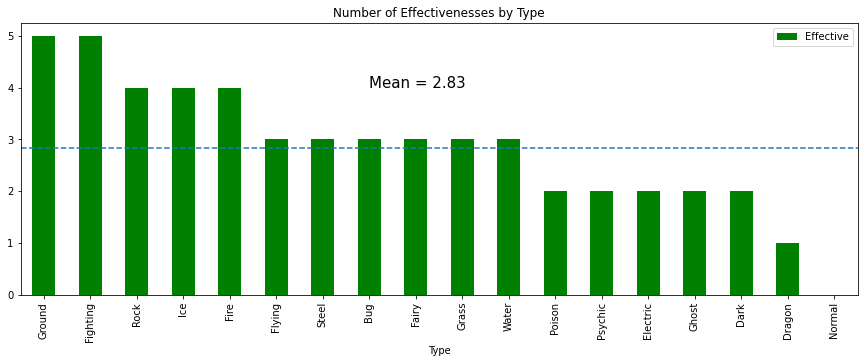

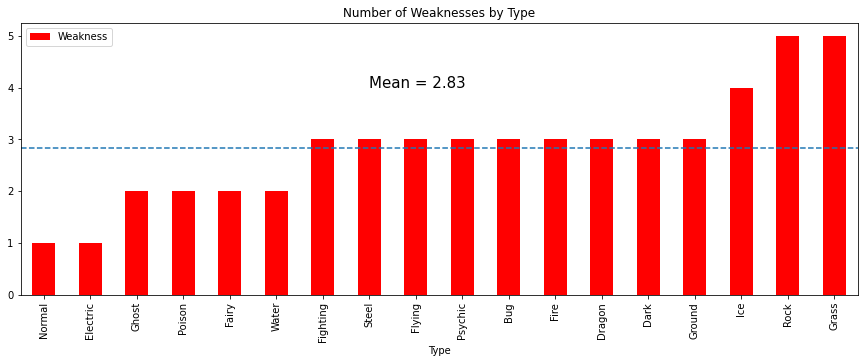

In [80]:
EffectiveTable = TypeChart.drop(['Weakness'], axis=1)
MeanEffectiveTable = float(round(EffectiveTable.mean(), 2))
EffectiveTable =EffectiveTable.sort_values('Effective', ascending = False)
EffectiveBar =(EffectiveTable.plot(kind="bar", title = 'Number of Effectivenesses by Type', color = "g",figsize=(15,5)).axhline(y=MeanEffectiveTable, linestyle='--'))
plt.annotate(f'Mean = {MeanEffectiveTable}', (7,4),fontsize=15,color="black")
plt.show()

WeaknessTable = TypeChart.drop(['Effective'], axis=1)
MeanWeaknessTable = float(round(WeaknessTable.mean(), 2))
WeaknessTable =WeaknessTable.sort_values('Weakness')
WeaknessBar =(WeaknessTable.plot(kind="bar", title = 'Number of Weaknesses by Type', color = "r", figsize=(15,5)).axhline(y=MeanWeaknessTable, linestyle='--'))
plt.annotate(f'Mean = {MeanWeaknessTable}', (7,4),fontsize=15,color="black")
plt.show()




## Pokemon Ranking

In [11]:
Pokemon_data.columns

Index(['Name', 'Type 1', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation'],
      dtype='object')

In [12]:
filtered_df = Pokemon_data[['Name','Type 1','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
filtered_df.head()

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,
1,Bulbasaur,Grass,45,49,49,65,65,45
2,Ivysaur,Grass,60,62,63,80,80,60
3,Venusaur,Grass,80,82,83,100,100,80
3,VenusaurMega Venusaur,Grass,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65


In [13]:
Poke_df = filtered_df.loc[Pokemon_data["Type 1"] == random_pokemon[1]] 
Poke_df

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,
63,Abra,Psychic,25,20,15,105,55,90
64,Kadabra,Psychic,40,35,30,120,70,105
65,Alakazam,Psychic,55,50,45,135,95,120
65,AlakazamMega Alakazam,Psychic,55,50,65,175,95,150
96,Drowzee,Psychic,60,48,45,43,90,42
97,Hypno,Psychic,85,73,70,73,115,67
122,Mr. Mime,Psychic,40,45,65,100,120,90
150,Mewtwo,Psychic,106,110,90,154,90,130
150,MewtwoMega Mewtwo X,Psychic,106,190,100,154,100,130


Psychic


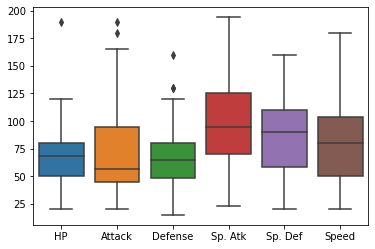

In [16]:
sns.boxplot(data=Poke_df)
print(random_pokemon[1])

<AxesSubplot:>

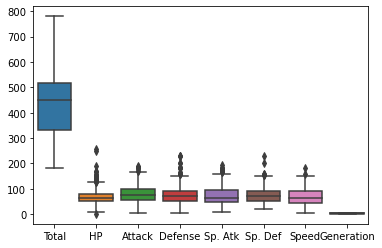

In [17]:
sns.boxplot(data=Pokemon_data)

In [18]:
stats_Pokemon_data = Pokemon_data.drop(['Total','Generation'], axis =1)


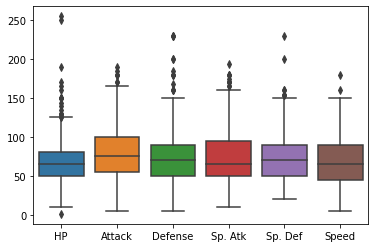

In [19]:
sns.boxplot(data=stats_Pokemon_data)
yaxis='points'

## Attack vs Defense Correlation by Type

## Statistical Analysis of Attack vs Defense  by Type

In [ ]:
hi